<a href="https://colab.research.google.com/github/aiga3333/21212/blob/master/1_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [3]:
!ls

drive  sample_data


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls '/content/gdrive/My Drive/Colab Notebooks/tuberculosis/base_dir/'

test_dir  train_dir  val_dir


In [0]:
train_dir = '/content/gdrive/My Drive/Colab Notebooks/tuberculosis/base_dir/train_dir/'
val_dir = '/content/gdrive/My Drive/Colab Notebooks/tuberculosis/base_dir/val_dir/'
test_dir = '/content/gdrive/My Drive/Colab Notebooks/tuberculosis/base_dir/test_dir/'

In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [0]:
img_width, img_height = 299, 299
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
epochs = 30
batch_size = 16
nb_train_samples = 680
nb_validation_samples = 60
nb_test_samples = 60

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.1))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        1

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model_filename='1_Scratch.hdf5'

callbacks1 = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=5,
            # min_delta=1,
            mode='max',
            verbose=1),

        ModelCheckpoint(
            filepath=model_filename,
            monitor='val_accuracy', mode='max',  # mode must be set to max or Keras will be confused
            save_best_only=True,
            verbose=1)
    ]


In [0]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #vertical_flip=True,
    #fill_mode='nearest',
) 

In [0]:
train_generator = datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/tuberculosis/base_dir/train_dir/',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 680 images belonging to 2 classes.


In [0]:
val_generator = datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/tuberculosis/base_dir/val_dir/',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 60 images belonging to 2 classes.


In [0]:
test_generator = datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/tuberculosis/base_dir/test_dir/',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 60 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks1)

Epoch 1/30
42/42 [==============================] - 68s 2s/step - loss: 0.1565 - accuracy: 0.9247 - val_loss: 0.7708 - val_accuracy: 0.7708
Epoch 2/30
42/42 [==============================] - 68s 2s/step - loss: 0.1166 - accuracy: 0.9443 - val_loss: 1.1511 - val_accuracy: 0.6875
Epoch 3/30
42/42 [==============================] - 68s 2s/step - loss: 0.1026 - accuracy: 0.9458 - val_loss: 1.2169 - val_accuracy: 0.7083
Epoch 4/30
42/42 [==============================] - 68s 2s/step - loss: 0.0701 - accuracy: 0.9714 - val_loss: 1.0961 - val_accuracy: 0.7500
Epoch 5/30
42/42 [==============================] - 68s 2s/step - loss: 0.0883 - accuracy: 0.9654 - val_loss: 1.2730 - val_accuracy: 0.7500
Epoch 6/30
42/42 [==============================] - 68s 2s/step - loss: 0.0801 - accuracy: 0.9669 - val_loss: 1.4040 - val_accuracy: 0.7500
Epoch 7/30
42/42 [==============================] - 69s 2s/step - loss: 0.0488 - accuracy: 0.9789 - val_loss: 1.6308 - val_accuracy: 0.7500
Epoch 8/30
42/42 [==

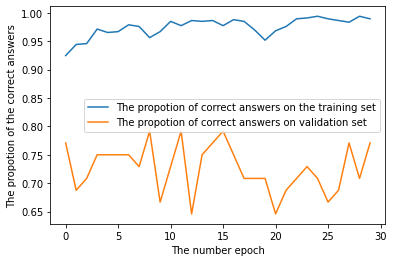

In [0]:
plt.plot(history.history['accuracy'], label='The propotion of correct answers on the training set')
plt.plot(history.history['val_accuracy'], label='The propotion of correct answers on validation set')
plt.xlabel('The number epoch')
plt.ylabel('The propotion of the correct answers')
plt.legend()
plt.show()

In [0]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

In [0]:
print("accuracy on testing set: %.2f%%" % (scores[1]*100))

accuracy on testing set: 91.67%


In [0]:
import math
#y_pred = model.predict_generator(test_generator,nb_test_samples / batch_size,verbose=1)
y_pred = model.predict_generator(test_generator,steps=math.ceil(nb_test_samples / batch_size),verbose=1)


4/4 [==============================] - 1s 374ms/step


In [0]:
#test_loss = model.evaluate(test_generator)
#predictions = model.predict(test_generator)  # Vector of probabilities


[[2.4873547e-13]
 [1.0000000e+00]
 [2.2488356e-13]
 [1.0000000e+00]
 [9.7852957e-01]
 [2.6866983e-05]
 [4.1694140e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
0.5166666666666667
              precision    recall  f1-score   support

      Normal       0.52      1.00      0.68        31
Tuberculosis       0.00      0.00      0.00        29

    accuracy                           0.52        60
   macro avg       0.26      0.50      0.34        60
weighted avg       0.27      0.52      0.35        60

[[31  0]
 [29  0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


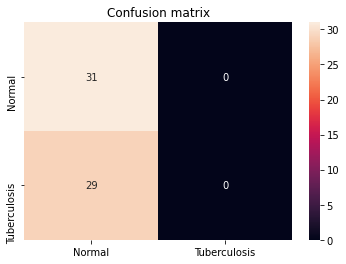

In [0]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn;


print(y_pred[:10])
pred_labels = np.argmax(y_pred, axis=1)  
print(pred_labels[:10])


y_test = test_generator.classes
print(y_test[:10])


acc = accuracy_score(y_test, pred_labels)
print(acc)

# classification report
target_names=['Normal', 'Tuberculosis']
report = classification_report(y_test, pred_labels, target_names=target_names)
print(report)

with open('classificationreport.txt', 'w') as f:
  f.write(report)

# confusion matrix
CM = confusion_matrix(y_test, pred_labels)
print(CM)

ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=target_names,
           yticklabels=target_names, ax=ax)
ax.set_title('Confusion matrix')
fig = plt.gcf()
plt.show()
fig.savefig('confusionmatrix.png')
